<a href="https://colab.research.google.com/github/pahvani/DAA-LAB-ASSIGNMENT-4/blob/main/Airline%20Crew%20Scheduling%20%E2%80%93%20NP-Hard%20Problem%20Solving%20%20%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


FINAL ASSIGNMENT:
C1 : ['F1', 'F3', 'F5']
C2 : ['F2']
C3 : ['F4']

Total Recursive Calls: 6


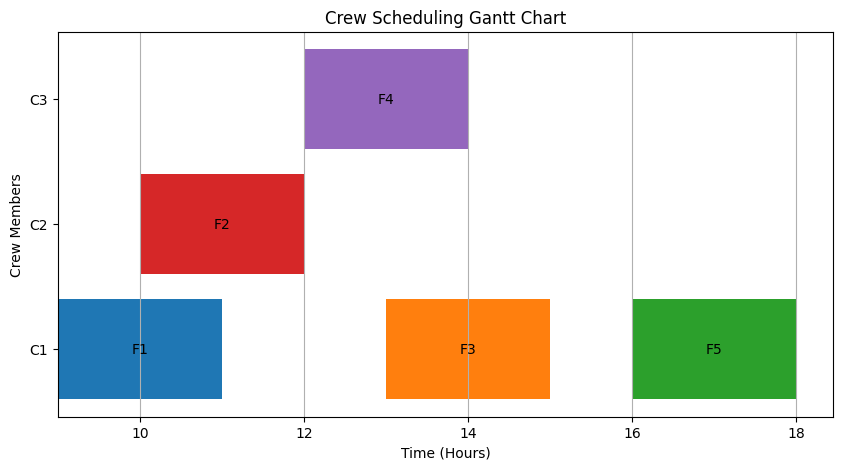

In [3]:


import matplotlib.pyplot as plt
from collections import defaultdict

flights = [
    ('F1', 9, 11),
    ('F2', 10, 12),
    ('F3', 13, 15),
    ('F4', 12, 14),
    ('F5', 16, 18),
]

crew_members = ['C1', 'C2', 'C3']
MIN_REST = 1
def is_compatible(existing_flights, new_flight):
    """Checks if new_flight can be assigned without time conflict + rest."""
    _, new_start, new_end = new_flight

    for _, start, end in existing_flights:

        if not (new_end + MIN_REST <= start or end + MIN_REST <= new_start):
            return False
    return True

recursive_calls = 0

def backtrack_assign(flights, crew_members, assignment, index):
    """Assign flights to crew members using backtracking."""
    global recursive_calls
    recursive_calls += 1

    if index == len(flights):
        return True

    flight = flights[index]

    for crew in crew_members:
        if is_compatible(assignment[crew], flight):
            assignment[crew].append(flight)

            if backtrack_assign(flights, crew_members, assignment, index + 1):
                return True

            assignment[crew].pop()

    return False

assignment = defaultdict(list)

if backtrack_assign(flights, crew_members, assignment, 0):
    print("\nFINAL ASSIGNMENT:")
    for c in crew_members:
        print(c, ":", [f[0] for f in assignment[c]])
else:
    print("No feasible schedule found.")

print("\nTotal Recursive Calls:", recursive_calls)

def plot_gantt(assignment):
    plt.figure(figsize=(10, 5))

    for idx, (crew, flist) in enumerate(assignment.items()):
        for f in flist:
            start = f[1]
            duration = f[2] - f[1]
            plt.barh(crew, duration, left=start)
            plt.text(start + duration / 2, crew, f[0], ha='center', va='center')

    plt.xlabel("Time (Hours)")
    plt.ylabel("Crew Members")
    plt.title("Crew Scheduling Gantt Chart")
    plt.grid(axis='x')
    plt.show()

plot_gantt(assignment)


